# CARGA DE DATASET Y LIBRERIAS

## Importacion de Librerias

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
#import seaborn as sns
%matplotlib inline

## Carga del dataset preparado 

In [26]:
df_homicidios_hechos_prepared = pd.read_csv('./data/df_homicidios_hechos_prepared.csv', sep = ',') # parametros adicionales: ', index_col= 'id', na_values='#N/D'


# IDENTIFICACION DE VARIABLES SIGNIFICATIVAS

Verificamos las variables que parecen ser mas significativas. Checkamos el primer registro rapidamente

In [27]:
df_homicidios_hechos_prepared.head(1)

,ID,Nro de Victimas,Fecha de Siniestro,Año,Mes,Dia de Semana,Dia,Hora Exacta,Hora del Dia,Direccion del Siniestro,Tipo de Calle,Calle,Dirección Normalizada,Comuna,Geocodigo Plano del Siniestro,Longitud Geografica,Latitud Geografica,Vehiculos Prticipantes,Vehiculo de la Victima,Vehiculo del Acusado
0,2016-0001,1,2016-01-01,2016,1,Viernes,1,04:00:00,4,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,PIEDRA BUENA AV.,"PIEDRA BUENA AV. y FERNANDEZ DE LA CRUZ, F., G...",8,Point (98896.78238426 93532.43437792),-58.47534,-34.68757,MOTO-AUTO,MOTO,AUTO


En un vistazo nos damos cuenta que la mayoria de las variables son categoricas.   
Analizamos las variables categoricas que parecen ser mas representativas usando graficas de barras de frecuencia horizontales, para corroborar cuales de ellas tienen por si mismas una mayor significancia  

In [28]:
def graficos_eda_categoricos(cat):
    
    #Calculamos el número de filas que necesitamos
    from math import ceil
    filas = ceil(cat.shape[1] / 2)

    #Definimos el gráfico
    f, ax = plt.subplots(nrows = filas, ncols = 2, figsize = (16, filas * 6))

    #Aplanamos para iterar por el gráfico como si fuera de 1 dimensión en lugar de 2
    ax = ax.flat 

    #Creamos el bucle que va añadiendo gráficos
    for cada, variable in enumerate(cat):
        cat[variable].value_counts().plot.barh(ax = ax[cada])
        ax[cada].set_title(variable, fontsize = 12, fontweight = "bold")
        ax[cada].tick_params(labelsize = 12)

In [29]:
print('columnas en df_homicidios_hechos_prepared: ','[' + ', '.join(df_homicidios_hechos_prepared.keys()) + ']') 


columnas en df_homicidios_hechos_prepared:  [ID, Nro de Victimas, Fecha de Siniestro, Año, Mes, Dia de Semana, Dia, Hora Exacta, Hora del Dia, Direccion del Siniestro, Tipo de Calle, Calle, Dirección Normalizada, Comuna, Geocodigo Plano del Siniestro, Longitud Geografica, Latitud Geografica, Vehiculos Prticipantes, Vehiculo de la Victima, Vehiculo del Acusado]


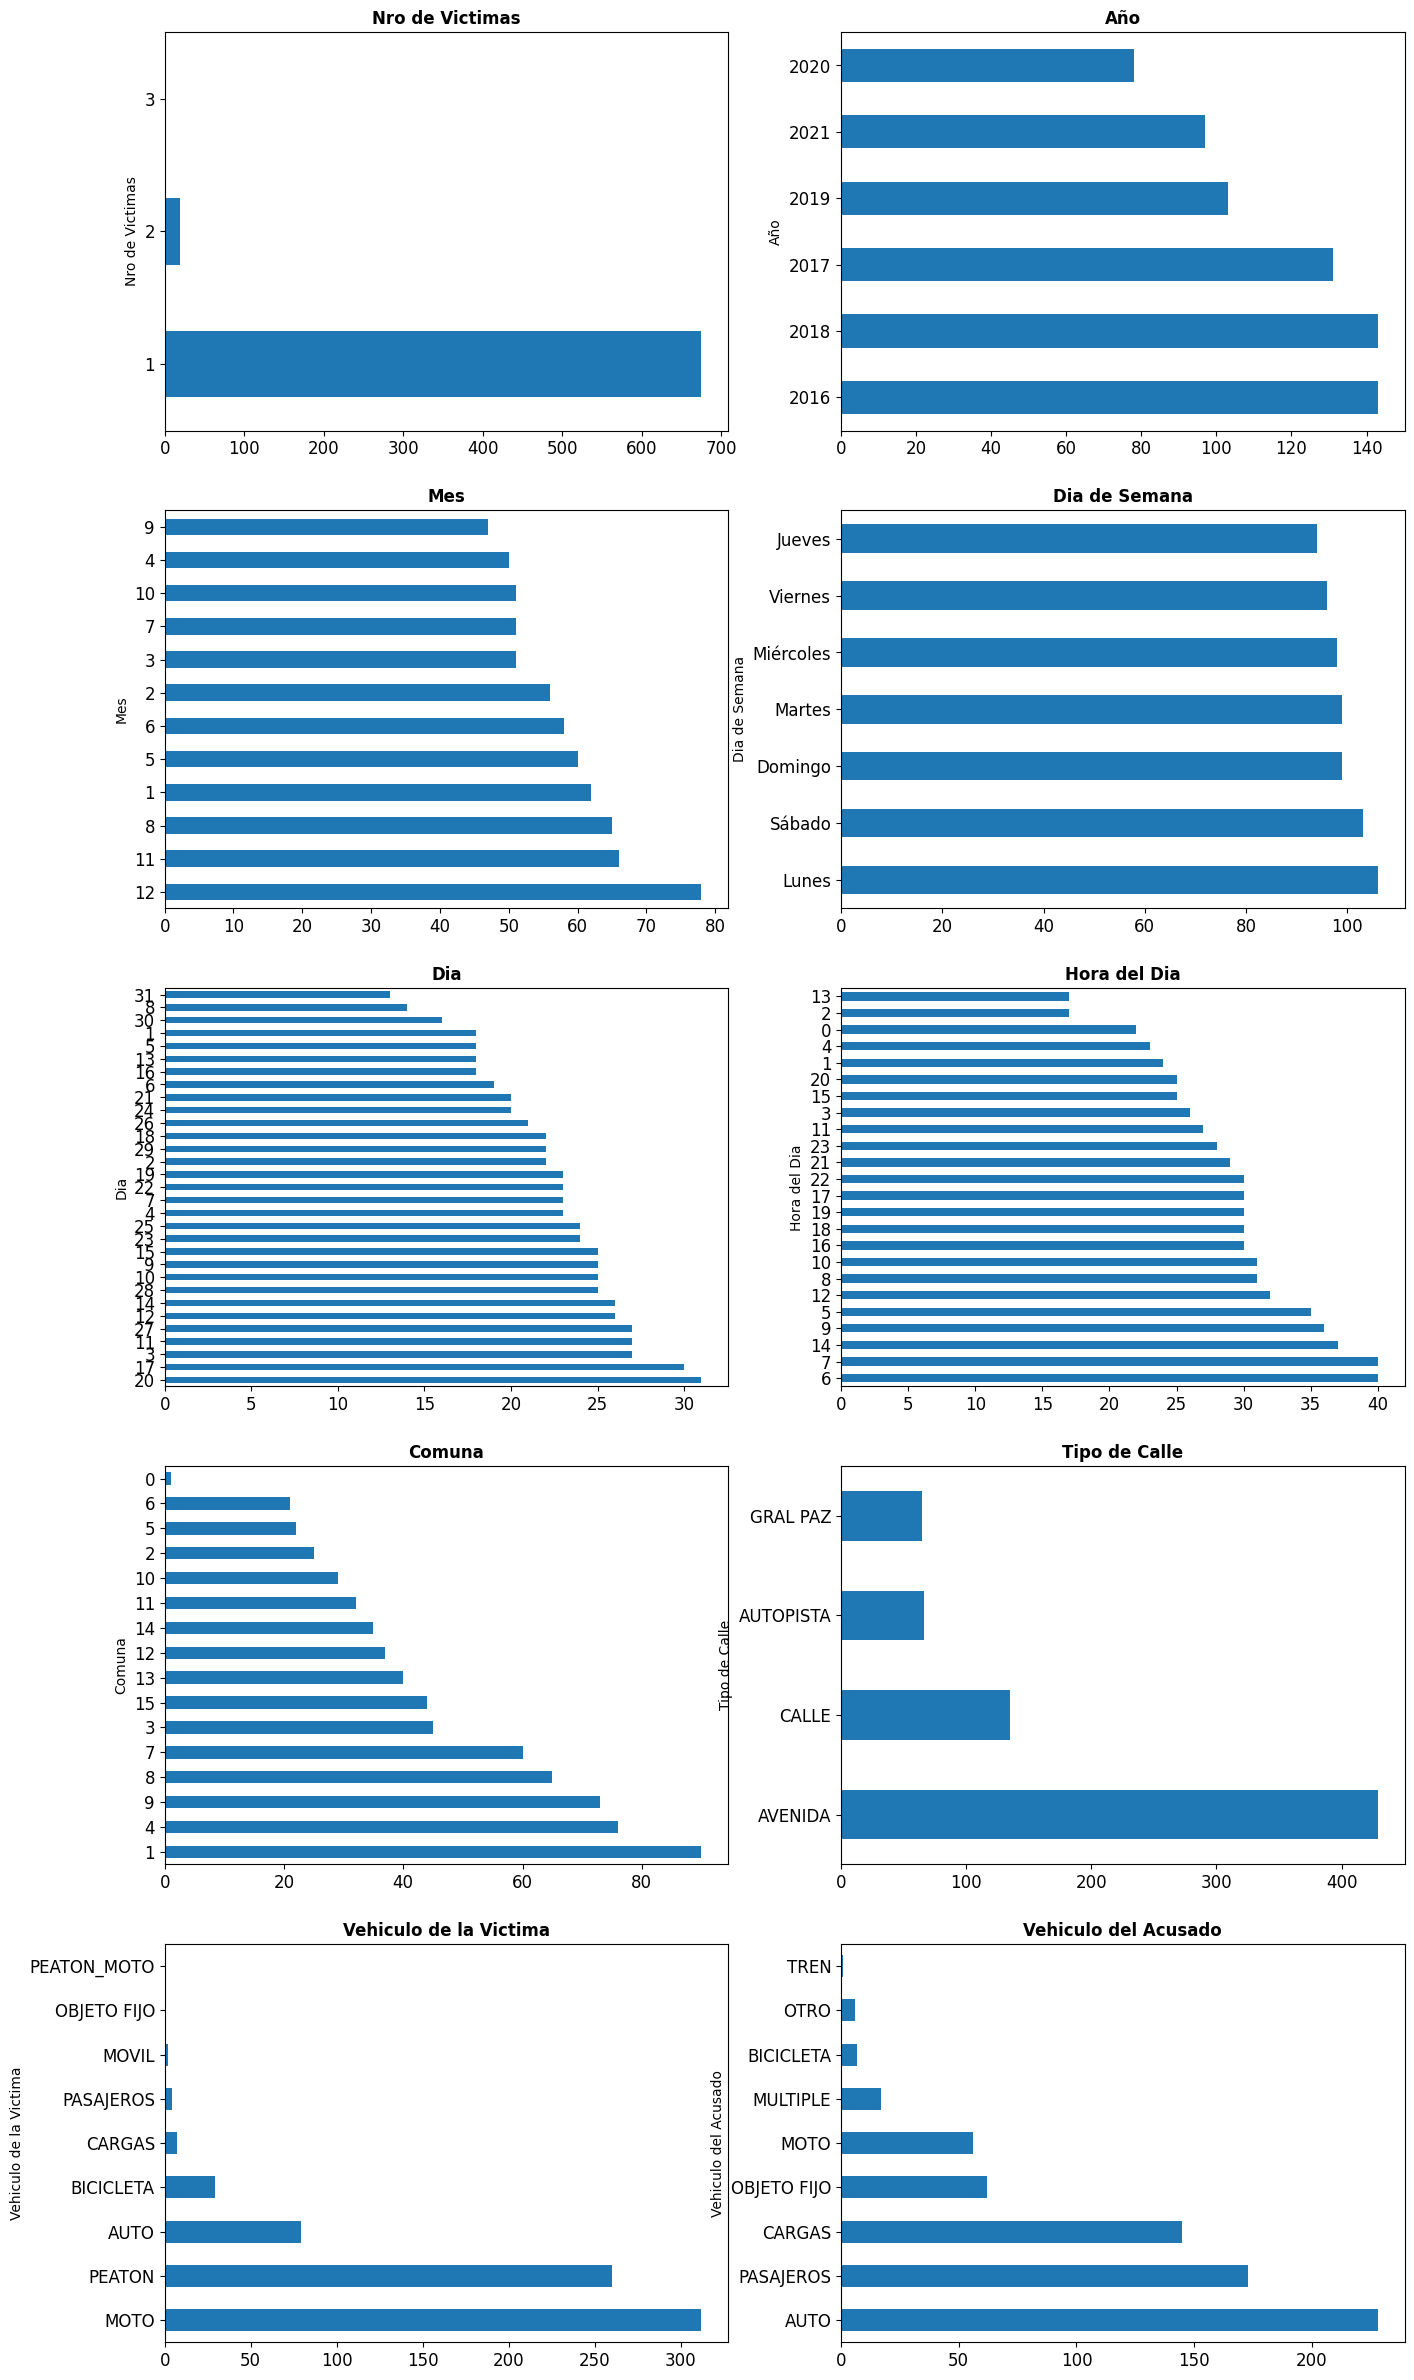

In [30]:
graficos_eda_categoricos(df_homicidios_hechos_prepared[['Nro de Victimas','Año','Mes','Dia de Semana','Dia','Hora del Dia','Comuna','Tipo de Calle','Vehiculo de la Victima','Vehiculo del Acusado']])

### Resultados del Analisis:
Vemos dos tipos de variables: 
* Variables que por si mismas presentan informacion significativa: 
    * Nro de Victimas
    * Tipo de Calle
    * Comuna
    * Vehiculo de la Victima
    * Vehiculo del Acusado

* Variables que por si mismas no presentan informacion significativa
    * Dia
    * Año
    * Mes
    * Dia de Semana
    * Dia (del mes)
    * Hora (del dia)


---
<br/><br/>

# ANALISIS DE VARIABLES POCO SIGNIFICATIVAS

### Analisis de Siniestros Anuales

In [31]:
print('Siniestros ocurridos en cada año:')
muertes = df_homicidios_hechos_prepared['Año'].value_counts().reset_index()
muertes.columns = ['Año', 'Siniestros']
print(muertes)

Siniestros ocurridos en cada año:
    Año  Siniestros
0  2016         143
1  2018         143
2  2017         131
3  2019         103
4  2021          97
5  2020          78


#### Resultados del Analisis: 
El año del siniestro no parece ser una variable que brinde algun factor a tomar en cuenta.  
Como observcion adicional, si bien la cantidad de siniestros se ha ido reduciendo en los ultimos años, hubo un rebote en el año 2018 que impide afirmar una tendencia clara de reduccion de siniestros 

---
<br/><br/>

### Analisis de Siniestros por Meses

In [32]:
print('Siniestros ocurridos en distintos meses:')
muertes = df_homicidios_hechos_prepared['Mes'].value_counts().reset_index()
muertes.columns = ['Mes', 'Siniestros']
print(muertes)

Siniestros ocurridos en distintos meses:
    Mes  Siniestros
0    12          78
1    11          66
2     8          65
3     1          62
4     5          60
5     6          58
6     2          56
7     3          51
8     7          51
9    10          51
10    4          50
11    9          47


#### Resultados del Analisis: 
Noviembre y Diciembre registran mas siniestros que el resto de meses, pero las diferencias no son amplias
No se verifican tendencias claras


---
<br/><br/>

### Analisis de Siniestros por Dia de la Semana: 
El dia de la semana no pareceser una variable que por si misma brinde algun factor a tomar en cuenta. Segun el grafico de barras hay mucha similitud entre la cantidad de siniestros en todos los dias de la semana

### Analisis de Siniestros por Dia del Mes

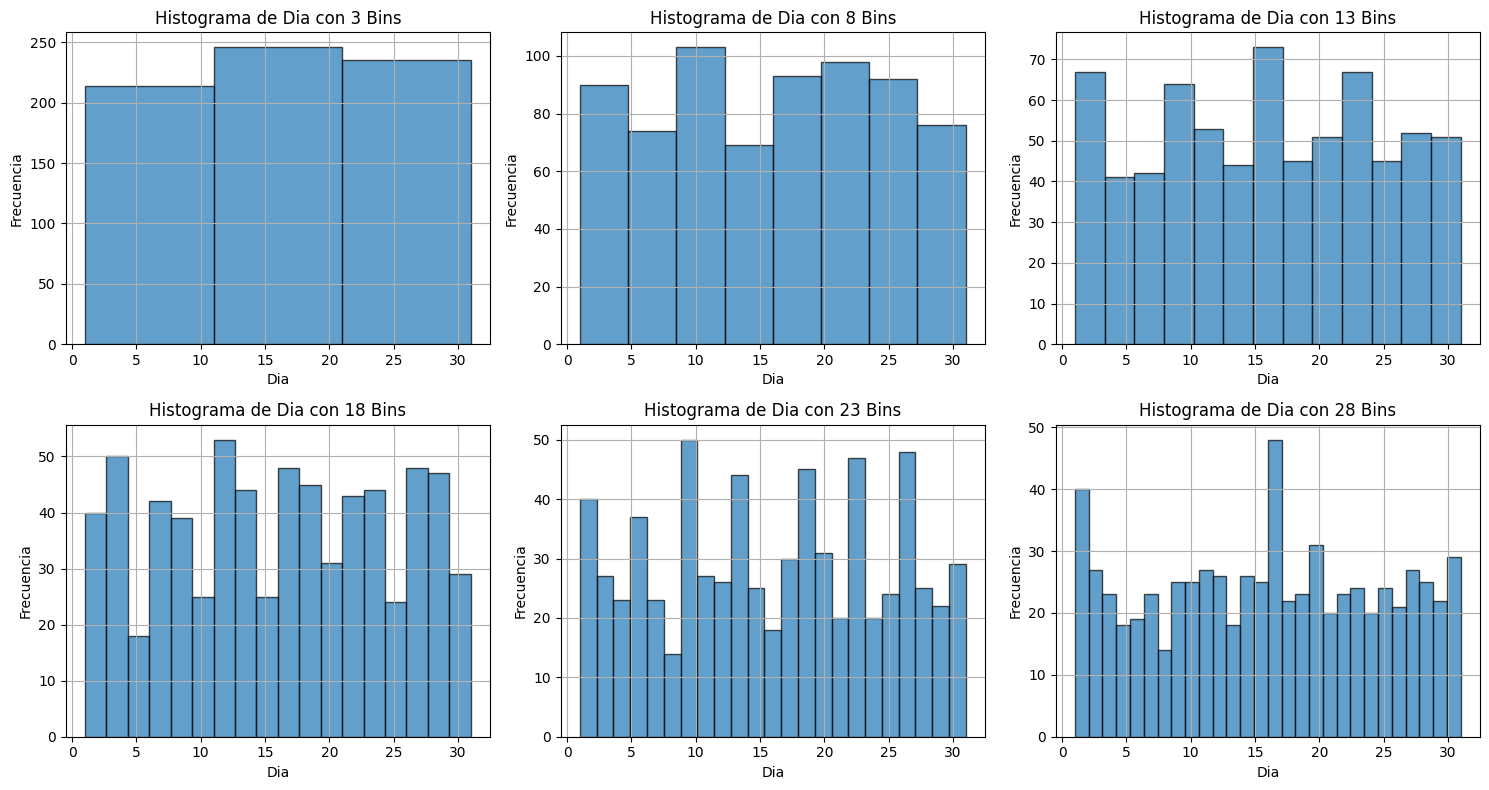

In [33]:
def graficos_dias(df, variable, valores_bins):
    filas = 2
    f, ax = plt.subplots(nrows=filas, ncols=3, figsize=(15, 8))
    ax = ax.flat

    for i, bins in enumerate(valores_bins):
        plt.sca(ax[i])
        plt.hist(df[variable], bins=bins, edgecolor='k', alpha=0.7)
        plt.title(f'Histograma de {variable} con {bins} Bins')
        plt.xlabel(variable)
        plt.ylabel('Frecuencia')
        plt.grid(True)

# Valores de bins a utilizar
valores_bins = [3, 8, 13, 18, 23, 28]

graficos_dias(df_homicidios_hechos_prepared, 'Dia', valores_bins)

# Ajustar el espaciado entre subplots
plt.tight_layout()
plt.show()


#### Resultados del Analisis: 
El dia del mes no parece ser una variable que por si misma brinde algun factor a tomar en cuenta.  
Incluso visto desde multiples perspectivas con histogramas de frecuencias no se muestra un patron claro

---
<br/><br/>

### Analisis de Siniestros Segun la Hora del Dia 

In [34]:
print('Siniestros ocurridos en distintos horarios:')
muertes = df_homicidios_hechos_prepared['Hora del Dia'].value_counts().reset_index()
muertes.columns = ['Hora del Dia', 'Siniestros']
print(muertes)

Siniestros ocurridos en distintos horarios:
    Hora del Dia  Siniestros
0              6          40
1              7          40
2             14          37
3              9          36
4              5          35
5             12          32
6              8          31
7             10          31
8             16          30
9             18          30
10            19          30
11            17          30
12            22          30
13            21          29
14            23          28
15            11          27
16             3          26
17            15          25
18            20          25
19             1          24
20             4          23
21             0          22
22             2          17
23            13          17


#### Resultados del Analisis:  
La hora del dia no muestra tendencias claras  
Podriamos afirmar que de 5 a 9 hs ocurrieron mas siniestros, pero los siniestros ocurridos a las 8 hs invalidan la tendencia  
Podriamos afirmar que de 0 a 4 hs ocurrieron menos siniestros, pero los siniestros ocurridos a las 3 hs invalidan la tendencia

---
<br/><br/>

### Analisis de Siniestros Viales en Tabla de Frecuencias Desagregada por Meses y Variables Afines

Observamos una tabla que compara las menores y las mayores ocurrencias de siniestros mes a mes  
Las variables computadas son
* Dia
* Dia de Semana
* Hora del Dia  
Centraremos nuestra atencion principalmente en los datos con lasmayores ocurrencias de siniestros

In [35]:
import pandas as pd
import calendar

# Supongamos que ya tienes cargado tu DataFrame df_homicidios_hechos_prepared.

# Define una función para obtener estadísticas de frecuencia por mes
def estadisticas_frecuencia_por_mes(mes):
    mes_nombre = calendar.month_name[mes]
    mes_df = df_homicidios_hechos_prepared[df_homicidios_hechos_prepared['Mes'] == mes]
    


    dias_frecuencia_min = mes_df['Dia'].value_counts().idxmin()
    dias_frecuencia_max = mes_df['Dia'].value_counts().idxmax()
    
    dias_semana_frecuencia_min = mes_df['Dia de Semana'].value_counts().idxmin()
    dias_semana_frecuencia_max = mes_df['Dia de Semana'].value_counts().idxmax()
    
    horas_dia_frecuencia_min = mes_df['Hora del Dia'].value_counts().idxmin()
    horas_dia_frecuencia_max = mes_df['Hora del Dia'].value_counts().idxmax()
    
    return pd.DataFrame({
        'Mes': [mes_nombre],
        'Dia del Mes con Menos Siniestros:': [dias_frecuencia_min],
        'Día del mes con Mas Siniestros:': [dias_frecuencia_max],
        'Día de la Semana con Menos Siniestros:': [dias_semana_frecuencia_min],
        'Día de la Semana con Mas Siniestros:': [dias_semana_frecuencia_max],
        'Hora del Día con Menos Siniestros:': [horas_dia_frecuencia_min],
        'Horas del Día con Mas Siniestros:': [horas_dia_frecuencia_max] 
    })

# Ciclo a través de cada mes y obtén las estadísticas de frecuencia
resultados = []
for mes in range(1, 13):
    resultados.append(estadisticas_frecuencia_por_mes(mes))

# Convierte los resultados en un DataFrame
resultados_df = pd.concat(resultados)

# Establece el mes como índice
resultados_df.set_index('Mes', inplace=True)

# Muestra la tabla descriptiva de frecuencia
print('TABLA DE FRECUENCIAS MES A MES')
resultados_df


TABLA DE FRECUENCIAS MES A MES


,Dia del Mes con Menos Siniestros:,Día del mes con Mas Siniestros:,Día de la Semana con Menos Siniestros:,Día de la Semana con Mas Siniestros:,Hora del Día con Menos Siniestros:,Horas del Día con Mas Siniestros:
Mes,,,,,,
January,8,11,Jueves,Lunes,3,10
February,9,17,Lunes,Domingo,13,5
March,5,15,Sábado,Martes,4,18
April,1,27,Domingo,Viernes,5,9
May,13,9,Jueves,Martes,22,3
June,6,3,Miércoles,Jueves,18,23
July,1,10,Martes,Sábado,19,6
August,18,17,Martes,Viernes,22,8
September,26,2,Lunes,Viernes,16,14


#### Resultados del Analisis:
No se ven marcadas diferencias  
Excepto el dato del Dia Domingo, no seven valores que sobresalgan mucho del resto. Dicho esto:  
* En los meses de Abril, Octubre y Diciembre ocurrieron mas siniestros el dia Domingo
* En los meses de Febrero y Agosto ocurrieron mas siniestros el dia 17
* En los meses de Octubre y Noviembre ocurrieron mas siniestros el dia 25
* En los meses de Octubre y Setiembre ocurrieron mas siniestros el dia 14
* En los meses de Julio y Diciembre ocurrieron mas siniestros el dia 6

---
<br/><br/>

# ANALISIS DE VARIABLES SIGNIFICATIVAS

### Analisis Sobre el Nro de Victimas por Siniestro

In [36]:
df_homicidios_hechos_prepared['Nro de Victimas'].value_counts(normalize = True) * 100

Nro de Victimas
1    97.122302
2     2.733813
3     0.143885
Name: proportion, dtype: float64

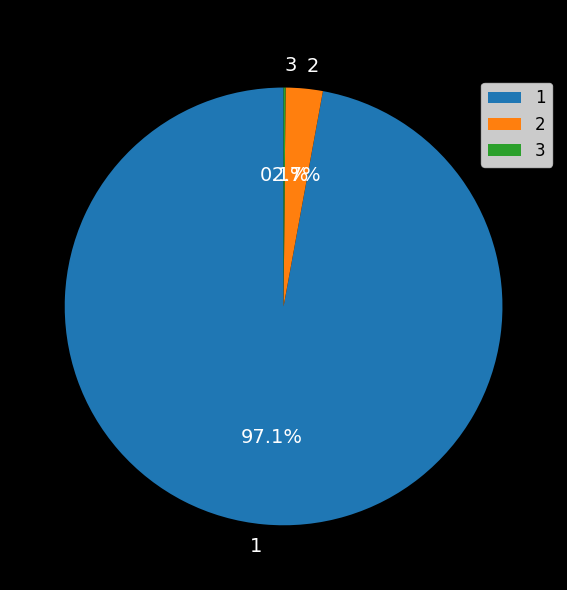

In [37]:
conteo_tipos_de_calle = df_homicidios_hechos_prepared['Nro de Victimas'].value_counts()

# Crear un gráfico de pastel
plt.figure(figsize=(6, 6), facecolor='black')
conteo_tipos_de_calle.plot(kind='pie', autopct='%1.1f%%', startangle=90, textprops={'color': 'white', 'fontsize': 14})
plt.title('Distribución para Tipos de Calle')
plt.legend(conteo_tipos_de_calle.index, bbox_to_anchor=(0.8, 0.7), loc="best", fontsize=12, bbox_transform=plt.gcf().transFigure)
#plt.patch.set_facecolor('#121212')  # Cambiar el color de fondo a un tono oscuro
#(1.05, 0.7) (1,0.7)
plt.ylabel('')
plt.tight_layout()
plt.show()

#### Resultados del Analisis:
Se muestra una tendecia clara en el numero de muertes por siniestro  
Mas del 97% de los siniestros causaron la muerte de solo una persona

---
<br/><br/>


### Analisis de Siniestros por Comunas  


Computamos las frecuencias acumuladas de siniestros en las diferentes comunas 

In [38]:
# Calcula la suma acumulada de siniestros en comunas
suma = df_homicidios_hechos_prepared['Comuna'].value_counts().reset_index()

# Calcular la suma acumulada y agregarla como una nueva columna
suma['Suma Acumulada'] = suma['count'].cumsum()
suma

,Comuna,count,Suma Acumulada
0,1,90,90
1,4,76,166
2,9,73,239
3,8,65,304
4,7,60,364
5,3,45,409
6,15,44,453
7,13,40,493
8,12,37,530
9,14,35,565


Computamos los decesos desagregados por años y comunas

In [39]:
import pandas as pd


# Filtrar los años que te interesan (2016-2021)
#df_filtered = df_homicidios_hechos_prepared[df_homicidios_hechos_prepared['Año'].between(2016, 2021)]

# Crear la tabla dinámica (pivot table) para sumar los valores por comuna y año
pivot_df = pd.pivot_table(df_homicidios_hechos_prepared, index='Comuna', columns='Año', values='Nro de Victimas', aggfunc='sum')
#pivot_df = pd.pivot_table(df_homicidios_hechos_prepared, index='Comuna', columns='Año', values='Nro de Victimas', aggfunc='sum')

# Reiniciar el índice para obtener una estructura de datos más estándar
#pivot_df = pivot_df.reset_index()

# Mostrar el DataFrame resultante
pivot_df


Año,2016,2017,2018,2019,2020,2021
Comuna,,,,,,
0,1.0,NaN,NaN,NaN,NaN,NaN
1,22.0,20.0,20.0,12.0,10.0,9.0
2,1.0,6.0,7.0,2.0,5.0,4.0
3,8.0,6.0,12.0,2.0,10.0,8.0
4,16.0,17.0,17.0,12.0,4.0,13.0
5,3.0,3.0,4.0,5.0,3.0,4.0
6,3.0,7.0,3.0,2.0,2.0,5.0
7,11.0,12.0,16.0,11.0,6.0,6.0
8,20.0,14.0,12.0,7.0,7.0,7.0


Graficamos el historico de decesos en cada comuna  

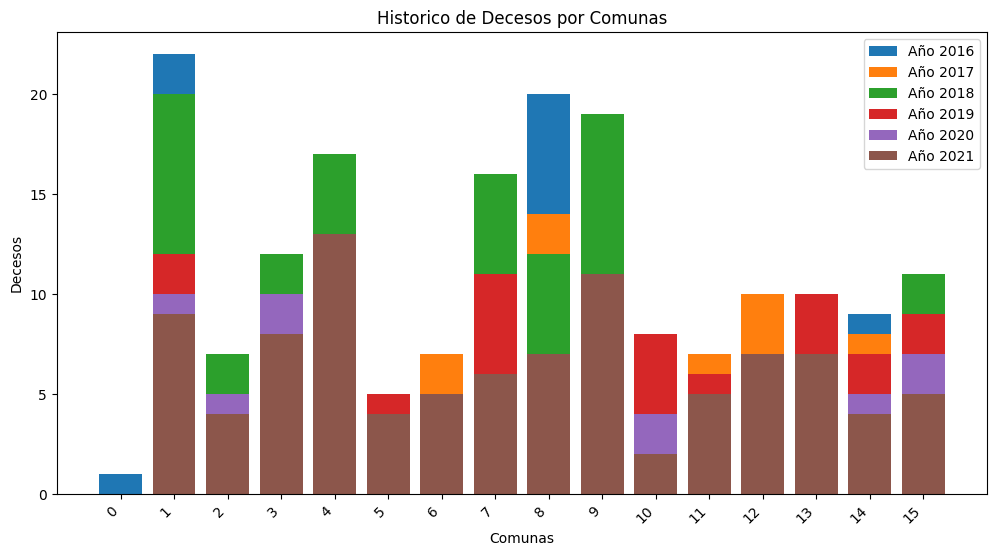

In [40]:
import matplotlib.pyplot as plt


# Configurar el tamaño del gráfico
plt.figure(figsize=(12, 6))

# Iterar a través de las columnas de años en pivot_df y trazar barras para cada comuna
for year in range(2016, 2022):
    plt.bar(pivot_df.index, pivot_df[year], label=f'Año {year}')




# Configurar etiquetas y título
plt.xlabel('Comunas')
plt.ylabel('Decesos')
plt.title('Historico de Decesos por Comunas')

# Mostrar leyenda
plt.legend()

# Establecer manualmente las etiquetas del eje x con todas las comunas
#plt.xticks(range(len(pivot_df['Comuna'])), pivot_df['Comuna'], rotation=45, ha='right')
plt.xticks(range(len(pivot_df.index)), pivot_df.index, rotation=45, ha='right')

# Mostrar el gráfico
plt.show()


#### Resultados del Analisis:  
Se verifica que ciertas comunas acaparan la mayor cantidad de siniestros.
De las 15 comunas, cinco (1, 4, 9, 8 y 7) de ellas se contabilizan mas de la mitad de siniestros: 364  
El año y la comuna con mas siniestros es 2016 y Comuna 1: 22 
En 2017 y 2018 tambien en Comuna 1 se registraron mas siniestros: 20 en cda año 

---
<br/><br/>

### Analisis de Siniestros Viales en Comunas con un Mapa Interactivo

Ahora usaremos la libreria Plotly Express para trazar los accidentes.  
Usando información de longitud y latitud, podemos ver qué área tiene más accidentes.

In [41]:
df = df_homicidios_hechos_prepared.copy()

# Extraer las coordenadas y campos adicionales
df["Comuna"] = df["Comuna"].astype(str)
coordenadas = df[['Latitud Geografica', 'Longitud Geografica','Comuna','Nro de Victimas']]

# Crear una figura de Plotly Express
#fig = px.scatter_mapbox(coordenadas, 
fig = px.scatter_mapbox(coordenadas, 
                     lat='Latitud Geografica', 
                     lon='Longitud Geografica',
                     color = 'Comuna',
                     #opacity=1,
                     size = 'Nro de Victimas',
                     size_max=13,
                     zoom = 11.5,
                     opacity=0.5,
                     title='Ubicación de Accidentes de Tráfico',
                     #color_discrete_map={i: f'Comuna {i}' for i in range(16)},  # Mapear valores a etiquetas
                     )  # template='plotly_dark' Establece un fondo oscuro

# Personaliza la apariencia del mapa
fig.update_layout(mapbox_style="open-street-map")  
fig.update_layout(margin={"r":0,"t":50,"l":0,"b":10}) 
fig.update_layout(autosize=False, width=1000, height=1000)

#fig.update_traces(marker=dict(opacity=1, line=dict(width=2, color='black')), selector=dict(type='scattermapbox'))
#fig.update_traces(marker=dict(opacity=1, line=dict(width=1, color='black')), selector=dict(type='scattermapbox'))

# Eliminar la barra de color
fig.update_layout(coloraxis_showscale=False)

# Definir una paleta de colores sólidos para las comunas
#color_scale = ['#FF5733', '#33FF57', '#5733FF', '#FF5733', '#33FF57', '#5733FF']  # Agrega más colores si es necesario

# Personalizar la paleta de colores
#fig.update_traces(marker=dict(opacity=0.7, colorbar=dict(title='Comuna'), colorbar_title_font_size=14), selector=dict(type='scattermapbox'))
#fig.update_traces(marker=dict(colorscale=color_scale), selector=dict(type='scatter'))

# Mostrar el mapa interactivo
fig.show()




#### Resultados del Analisis:
Podemos inferir del mapa que : 
* Hay concentracion de siniestros en las comunas de las zonas del Centro-Sur y del Este de la ciudad, con mayor preponderancia en esta ultima zona

---
<br/><br/>

### Analisis de Siniestros en: 'Tipo de Calle' 'Vehiculo del Acusado' 'Vehiculo de la Victima'


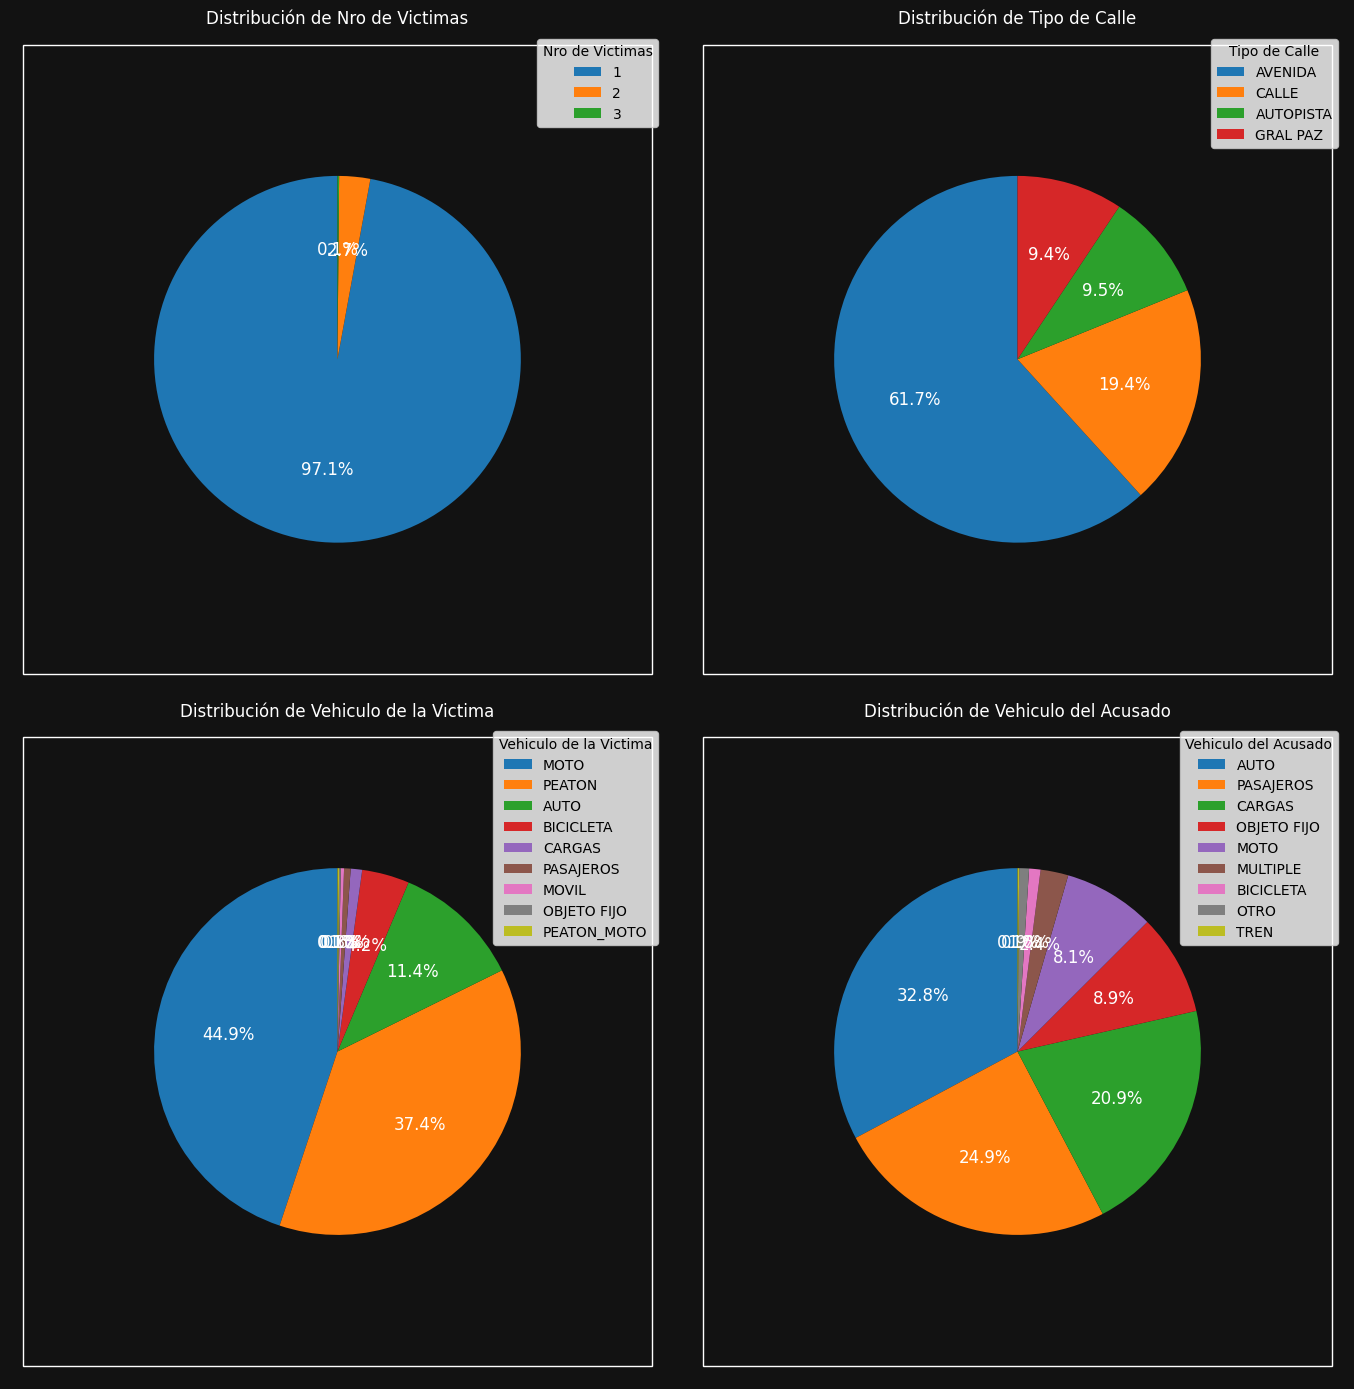

In [42]:
import matplotlib.pyplot as plt

# Lista de columnas que deseas graficar
columnas_a_graficar = ['Nro de Victimas', 'Tipo de Calle', 'Vehiculo de la Victima', 'Vehiculo del Acusado']

# Crear una figura con 2 filas y 2 columnas para los gráficos
fig, axs = plt.subplots(2, 2, figsize=(14, 14))
#plt.subplots_adjust(wspace=0.1)
plt.subplots_adjust(wspace=0.3) 
fig.patch.set_facecolor('#121212')  # Cambiar el color de fondo a un tono oscuro

# Ajustar manualmente la posición de los subplots para reducir la separación horizontal
plt.subplots_adjust(left=0.05, right=0.95, bottom=0.05, top=0.95, wspace=0.2, hspace=0.3)
# Iterar a través de las columnas y generar los gráficos de pastel
for i, columna in enumerate(columnas_a_graficar, 0):
    row = i // 2
    col = i % 2
    ax = axs[row, col]

    # Extraer los datos de la columna
    datos = df_homicidios_hechos_prepared[columna].value_counts()

    # Crear un gráfico de pastel para la columna actual
    wedges, texts, autotexts = ax.pie(datos, autopct='%1.1f%%', startangle=90, textprops={'color': 'white', 'fontsize': 12}, radius=0.7)
    ax.set_title(f'Distribución de {columna}', color='white')

    # Agregar una leyenda al subplot
    ax.legend(datos.index, title=columna, loc="best", fontsize=10) #, loc="center right", bbox_to_anchor=(1.2, 0.5)

    # Dibujar un rectángulo alrededor del subplot
    rect = plt.Rectangle((-1.2, -1.2), 2.4, 2.4, linewidth=1, edgecolor='white', fill=False)
    ax.add_patch(rect)

# Ajustar el espaciado entre los gráficos y el título
plt.tight_layout()
#plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.show()


#### Resultados del Analisis:
La mayor cantidad de siniestros se produjeron en avenidas: 61%  
El tipo de vehiculo causante de mas siniestro fue el auto (32.8%) seguido de los de pasajeros (24.9%)  
El tipo de vehiculo que padecio de mas siniestro fue el moto (44.9%), seguido de los peatones (37.4%)  

---
<br/><br/>

### Analisis de Siniestros Viales en Tabla de Frecuencias Desagregada por Comunas y Vias de Transito

Observamos una tabla que compara por comunas las calle con mayores ocurrencias de siniestros  
Las variables computadas son
* Calle en que ocurrio el siniestro
* Tipo de Via de la Calle
Centraremos nuestra atencion principalmente en los datos con lasmayores ocurrencias de siniestros

In [43]:
import pandas as pd
import calendar

# Supongamos que ya tienes cargado tu DataFrame df_homicidios_hechos_prepared.

# Define una función para obtener estadísticas de frecuencia por mes
def estadisticas_frecuencia_por_comunas(comuna):
    #comuna_nombre = calendar.month_name[comuna]
    comuna_df = df_homicidios_hechos_prepared[df_homicidios_hechos_prepared['Comuna'] == comuna]
       
    via_frecuencia_max = comuna_df['Calle'].value_counts().idxmax()
    via_frecuencia_max_count = comuna_df['Calle'].value_counts()[0]
    #via_frecuencia_max_count1 = comuna_df['Calle'].value_counts().idxmax()[0]
    via_frecuencia_max_tipo_calle = df_homicidios_hechos_prepared[df_homicidios_hechos_prepared['Calle'] == via_frecuencia_max]['Tipo de Calle'].str.strip('[]').unique()
    
    return pd.DataFrame({
        'Comuna': [comuna],
        'Via con Mas Siniestros:' : [via_frecuencia_max],
        'Cantidad de Siniestros:' : [via_frecuencia_max_count],
        'Tipo de Calle:' : [via_frecuencia_max_tipo_calle],
        #'Cuenta1:' : [via_frecuencia_max_count1],
        #'Día de la Semana con Menos Siniestros:': [dias_semana_frecuencia_min],
        #'Día de la Semana con Mas Siniestros:': [dias_semana_frecuencia_max],
        #'Hora del Día con Menos Siniestros:': [horas_dia_frecuencia_min],
        #'Horas del Día con Mas Siniestros:': [horas_dia_frecuencia_max] 
    })

# Ciclo a través de cada mes y obtén las estadísticas de frecuencia
resultados = []
for comuna in range(0, 16):
    resultados.append(estadisticas_frecuencia_por_comunas(comuna))

# Convierte los resultados en un DataFrame
resultados_df = pd.concat(resultados)

# Establece el mes como índice
resultados_df.set_index('Comuna', inplace=True)

# Muestra la tabla descriptiva de frecuencia
print('TABLA DE FRECUENCIAS POR COMUNAS')
resultados_df


TABLA DE FRECUENCIAS POR COMUNAS


,Via con Mas Siniestros:,Cantidad de Siniestros:,Tipo de Calle:
Comuna,,,
0,AUTOPISTA 25 DE MAYO,1,[AUTOPISTA]
1,AUTOPISTA 1 SUR PRESIDENTE ARTURO FRONDIZI,6,[AUTOPISTA]
2,CORDOBA AV.,4,[AVENIDA]
3,RIVADAVIA AV.,4,[AVENIDA]
4,AUTOPISTA 1 SUR PRESIDENTE ARTURO FRONDIZI,8,[AUTOPISTA]
5,"SALGUERO, JERONIMO",2,"[AVENIDA, CALLE]"
6,DIRECTORIO AV.,3,[AVENIDA]
7,RIVADAVIA AV.,7,[AVENIDA]
8,"PAZ, GRAL. AV.",15,[GRAL PAZ]


##### Resultados del Analisis:
Podemos inferir informacion pertinente: 
* En las comunas 8, 9, 11 y 12, la Gral Paz es la via con mas siniestros
* De todas las vias de la ciudad, en la Gral Paz ocurrieron la mayor cantidad de siniestros: 52 ocurrencias 

---
<br/><br/>

# RESULTADOS OBTENIDOS

## Resumen de Insights Encontrados:  

**Sobre el Nro de Victimas**  
* Mas del 97% de los siniestros causaron la muerte de solo una persona
* Observacion: se muestra una tendecia clara en el numero de muertes que se produjeron an cada siniestro  
<br/>
  
**Sobre los Tipos de Vehiculos Involucrados en SIniestos Viales**
* El tipo de vehiculo causante de mas siniestro fue el auto (32.8%) seguido de los de pasajeros (24.9%)
* El tipo de vehiculo que padecio de mas siniestro fue el moto (44.9%), seguido de los peatones (37.4%)
* Observacion: se muestra una tendecia clara sobre los vehiculos involucrados en siniestros  
 <br/>

**Sobre las Comunas de Buenos Aires**  
* Hay concentracion de siniestros en las comunas de las zonas del Centro-Sur y Este de la ciudad, con mayor preponderancia en esta ultima zona
* Se verifica que ciertas comunas acaparan la mayor cantidad de siniestros.
* De las 15 comunas, en cinco (1, 4, 9, 8 y 7) de ellas se contabilizan mas de la mitad de siniestros: 364
* En el 2016, fue en la Comuna 1 donde ocurrieron la mayor cantidad de siniestros: 22
* En 2017 y 2018 tambien en Comuna 1 se registraron mas siniestros: 20 en cada año  
<br/>

**Sobre los Tipos de Vias de Transito en que Ocurrieron Siniestros**
* En las comunas 8, 9, 11 y 12, la Gral Paz es la via con mas siniestros
* De todas las vias de la ciudad, en la Gral Paz ocurrieron la mayor cantidad de siniestros: 52 ocurrencias 
* La mayor cantidad de siniestros se produjeron en avenidas: 61%  
<br/>

**Sobre los Siniestros Organizados por Meses del Año**
* Noviembre y Diciembre registran mas siniestros que el resto de meses, pero las diferencias no son amplias
* Observacion: El mes del año no parece ser una variable que brinde algun factor a tomar en cuenta pues no se verifican tendencias claras.  
<br/>

**Sobre los Dias del Mes que Registraron Siniestros**
* En los meses de Febrero y Agosto ocurrieron mas siniestros el dia 17
* En los meses de Octubre y Noviembre ocurrieron mas siniestros el dia 25
* En los meses de Octubre y Setiembre ocurrieron mas siniestros el dia 14
* En los meses de Julio y Diciembre ocurrieron mas siniestros el dia 6
* El dia del mes no parece ser una variable que por si misma brinde algun factor a tomar en cuenta. Incluso visto desde multiples perspectivas con histogramas de frecuencias no se muestra un patron claro  
<br/>

**Sobre los Siniestros Organizados por Dias de la Semana**
* En los meses de Abril, Octubre y Diciembre ocurrieron mas siniestros el dia Domingo
* Observacion: el dia de la semana no parece ser una variable que por si misma brinde algun factor a tomar en cuenta. Segun el grafico de barras hay mucha similitud entre la cantidad de siniestros en todos los dias de la semana  
<br/>

**Sobre el Año en que Ocurrio el Siniesto**
* De los años registrados, en el 2016 ocurrieron la mayor cantidad de siniestros con 145, seguido por el año 2017 con 140 ocurrencias
* Si bien la cantidad de siniestros se ha ido reduciendo en los ultimos años, hubo un rebote en el año 2018 que impide afirmar una tendencia clara de reduccion de siniestros   
* Observacion: el año del siniestro no parece ser una variable que brinde algun factor a tomar en cuenta pues no se verifican tendencias claras.  
<br/>

**Sobre los Siniestros Organizados por Horas del Dia**
* Podriamos afirmar que de 5 a 9 hs ocurrieron mas siniestros, pero los siniestros ocurridos a las 8 hs invalidan la tendencia
* Podriamos afirmar que de 0 a 4 hs ocurrieron menos siniestros, pero los siniestros ocurridos a las 3 hs invalidan la tendencia
* Observacion: la hora del dia no parece ser una variable que por si misma muestre tendencias claras  



---
<br/><br/>

## Conclusiones y Recomendaciones

### A continuancion se exponen algunas conclusiones a partir de los insights encontrados:  




1. El resultado del analisis univariable demostro que se debe dar mayor atencion a las siguientes variables:
* Nro de Victimas
* Tipo de Calle
* Comuna
* Vehiculo de la Victima
* Vehiculo del Acusado 

2. Sabiendo que en la gran mayoria de siniestros se registro una sola victima por ocurrencia y sabiendo que el tipo de vehiculo que padecio de mas siniestros fue la moto (44.9%) seguido por los peatones (37.4%) **se recomienda tomar medidas que se enfoquen en la seguridad vial de los motociclistas y peatones**.   
**Ademas se considera prioritario tomar medidas para reducir los siniestros producidos por automoviles y vehiculos de pasajeros** dado que causaron el 32.8% y el 24.9% de los siniestros respectivamente.

3. Sabiendo que las comunes mas proclives a los siniestros se concentran en las zonas Centro-Sur y Este de la ciudad **se recomienda priorizar la atencion de esas zonas, en especial a las comunas 1, 4, 9, 8 y 7**, dado que de las 16 comunas, en aquellas ocurrieron mas de la mitad de siniestros. 
De entre esas cinco comunas, **se sugiere dar aun mas relevancia a la Comuna 1** dado que alli se registraron la mayor cantidad de siniestros.

5. Dado que el 61% de los siniestros se produjeron en avenidas **se recomienda dar preferencia especial a este tipo de via a la hora de diseñar las medidas de seguridad vial**
En cuanto a las vias por donde circula el transito de la ciudad **se recomienda prestar atencion a la autopista Gral Paz** dado que alli se registraron la mayor cantidad de siniestros: 52

6. Dado que Noviembre y Diciembre registran mas siniestros que en el resto de los meses (aunque no por mucha diferencia) **se sugiere prestar atencion a esos meses**.
Asimismo, las fechas listadas a continuacion han registrado ciertos picos de siniestros, por lo que **se recomienda revisar si esos dias coincidan con dias feriados, fines de semana largos u otros acontecimientos interesantes de analizar**:
* 17 Febrero y Agosto
* 25 de Octubre y Noviembre
* 14 de Octubre y Setiembre
* 6 Julio y Diciembre 
